<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/Business_Analytics/MiniProject_3_BitCoin_Forecasting_ARMA_Stan_Sachin_Ver_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Bitcoin price forecasting using ARMA

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARMA model and forecast the bit coin price

## Dataset



Bitcoin is a digital currency created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

Data Description
This dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and is updated till 09-July-2021. All the column descriptions are provided below.

* Date: Day/Month/Year
* Open: Price from the first transaction of a trading day
* High: Maximum price in a trading day
* Low: Minimum price in a trading day
* Close: Price from the last transaction of a trading day
* Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions
* Volume: Number of units traded in a day

## Problem Statement

Perform EDA and forecast the Bitcoin price using ARMA model on timeseries (bitcoin) data.

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/BTC.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import itertools

In [ ]:
!pip install statsmodels --upgrade

### Load the data and perform EDA [2 points]

Hint: Refer to this ['Bitcoin dataset EDA'](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_SNB_MiniProject_3_BitCoin_Forecasting_ARMA_Exploratory%20Data%20Analysis.pdf)

In [ ]:
dfBitcoin1 = pd.read_csv("BTC.csv")
dfBitcoin1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10
2516,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10


In [ ]:
# YOUR CODE HERE
dfBitcoin = pd.read_csv("BTC.csv")
dfBitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10
2516,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10


In [ ]:
dfBitcoin['Date'] = pd.to_datetime(dfBitcoin['Date'])
dfBitcoin.set_index('Date', inplace=True)

In [ ]:
dfBitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2014-09-17 to 2021-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


In [ ]:
dfBitcoin.isnull().sum()

,0
Open,4
High,4
Low,4
Close,4
Adj Close,4
Volume,4


In [ ]:
dfBitcoinCleaned = dfBitcoin.dropna()

In [ ]:
dfBitcoinCleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-09-17 to 2021-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [ ]:
rows_with_dash = dfBitcoinCleaned[dfBitcoinCleaned.isin(['-']).any(axis=1)]

In [ ]:
len(rows_with_dash)

0

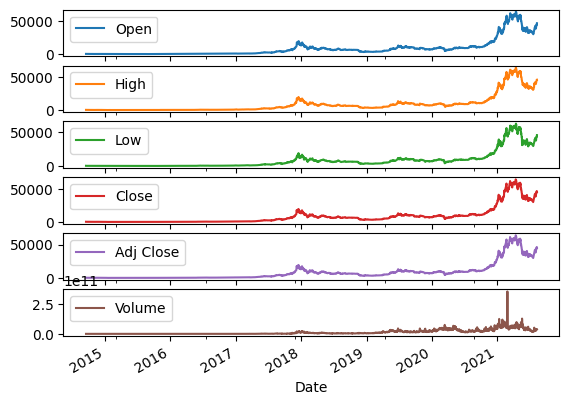

In [ ]:
# plotting multiple variables
dfBitcoinCleaned.plot(subplots=True)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

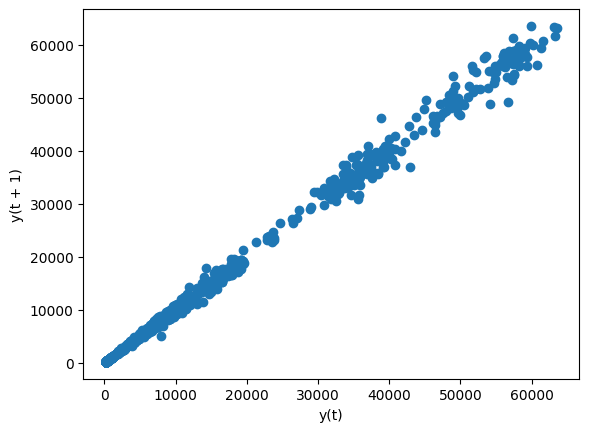

In [ ]:
pd.plotting.lag_plot(dfBitcoinCleaned['Close'], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

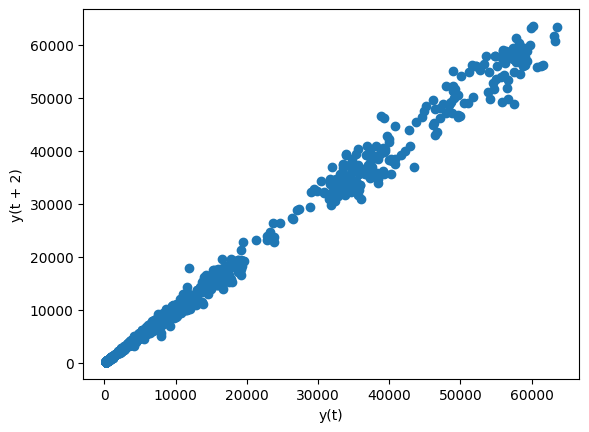

In [ ]:
pd.plotting.lag_plot(dfBitcoinCleaned['Close'], lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

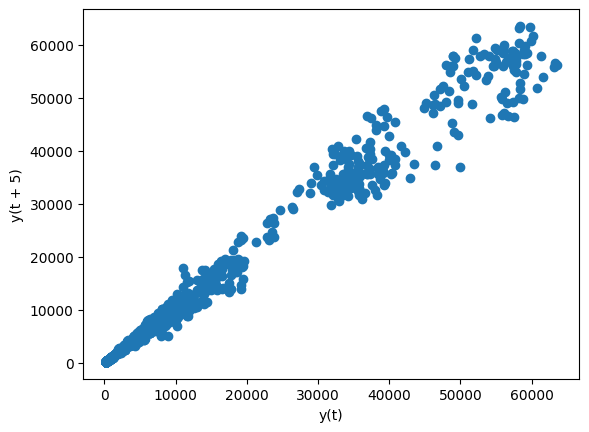

In [ ]:
pd.plotting.lag_plot(dfBitcoinCleaned['Close'], lag=5)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

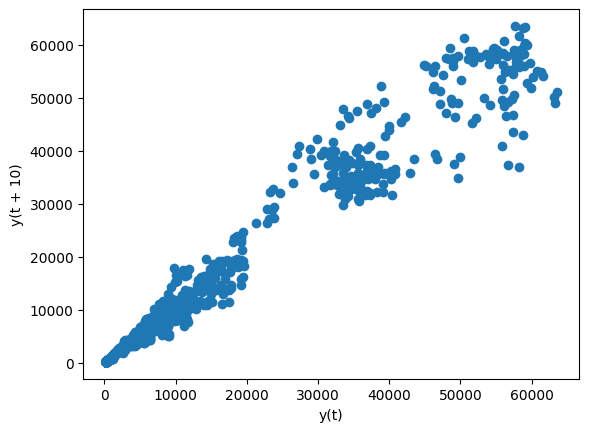

In [ ]:
pd.plotting.lag_plot(dfBitcoinCleaned['Close'], lag=10)

#### Analyze the correlation (heatmap) of all the features

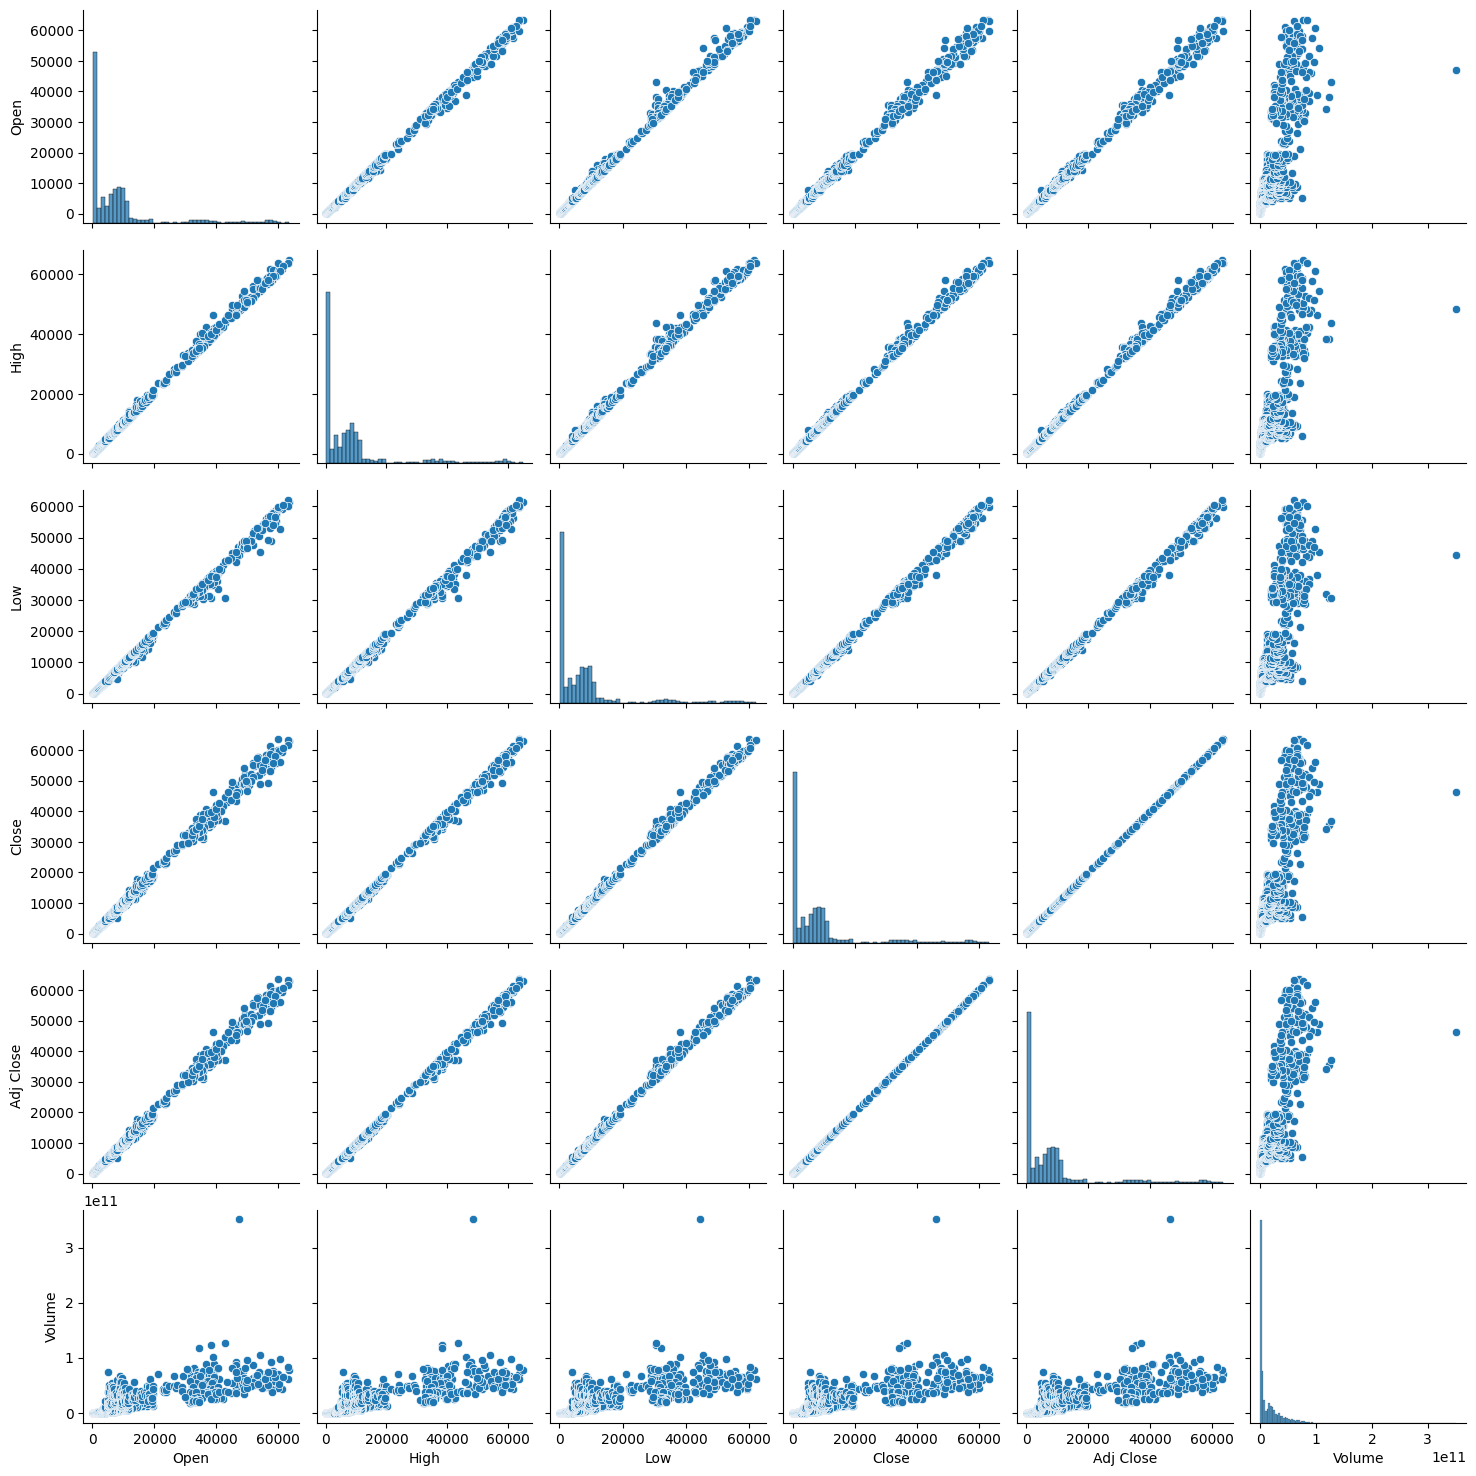

In [ ]:
# YOUR CODE HERE
import seaborn as sns
heatmapBitcoinCleaned = sns.pairplot(dfBitcoinCleaned[dfBitcoinCleaned.columns])

### **Except volume, all other variables look to be strongly correlated.**

In [ ]:
PearsonCorr_Bitcoin = dfBitcoinCleaned[dfBitcoinCleaned.columns].corr(method='pearson')
PearsonCorr_Bitcoin

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999412,0.998898,0.998607,0.998607,0.791723
High,0.999412,1.000000,0.998812,0.999398,0.999398,0.794166
Low,0.998898,0.998812,1.000000,0.999258,0.999258,0.785406
Close,0.998607,0.999398,0.999258,1.000000,1.000000,0.790311
Adj Close,0.998607,0.999398,0.999258,1.000000,1.000000,0.790311
Volume,0.791723,0.794166,0.785406,0.790311,0.790311,1.000000


<Axes: >

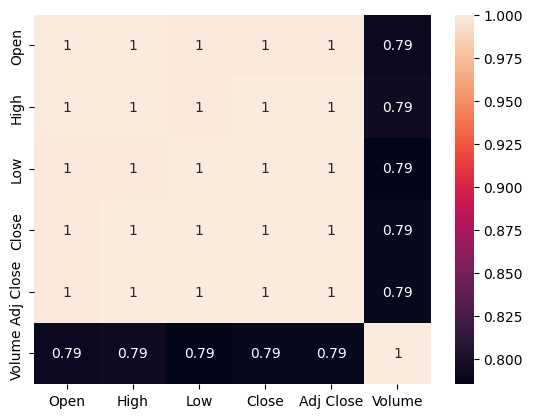

In [ ]:
sns.heatmap(PearsonCorr_Bitcoin,annot=True)

### Test the Stationarity using Augmented Dicky Fuller Test [1 point]

The Augmented Dicky Fuller test is a type of statistical test called a unit root test.

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:
dfBitcoinCleaned['Close']

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-08-06,42816.500000
2021-08-07,44555.800781
2021-08-08,43798.117188


In [ ]:
# YOUR CODE HERE
#Perform Dickey Fuller test
ADFTestResult = adfuller(dfBitcoinCleaned['Close'])
print('ADF Stastistic: %f'%ADFTestResult[0])
print('p-value: %f'%ADFTestResult[1])
print('Critical Values:')
for key,value in ADFTestResult[4].items():
    print('\t%s: %.3f ' % (key, value))

ADF Stastistic: -0.038593
p-value: 0.955222
Critical Values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


### *** Test stastistic is more than critical values. So we fail to reject the Null Hypothesis. Hence, the series is non-stationary. ***

### Identify the trends and seasonality from the given time series data [2 points]

* Apply seasonal decompose and plot the results
* Check the stationarity of data using rolling mean and rolling standard deviation.
* Make the time series data stationary
  * Apply a log transformation to reduce the variance of the series
  * Eliminate the Trend and Seasonality by Differencing

**Note:** Ensure timeseries without NaN, inf, -inf values, Replace with 0 if found.

Read more about stationarity of a timeseries in the following [link](https://machinelearningmastery.com/time-series-data-stationary-python/)

### **Apply seasonal decompose and plot the results**

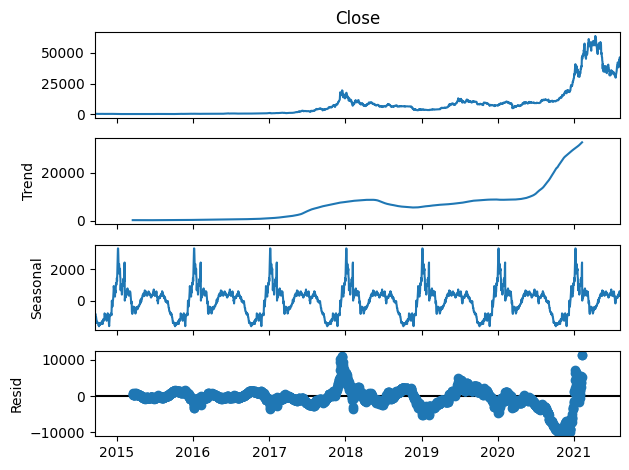

In [ ]:
# YOUR CODE HERE
# Apply seasonal decompose and plot the results
result = seasonal_decompose(dfBitcoinCleaned['Close'], model='additive', period = 365)
result.plot()
plt.show()



### **Check the stationarity of data using rolling mean and rolling standard deviation.**

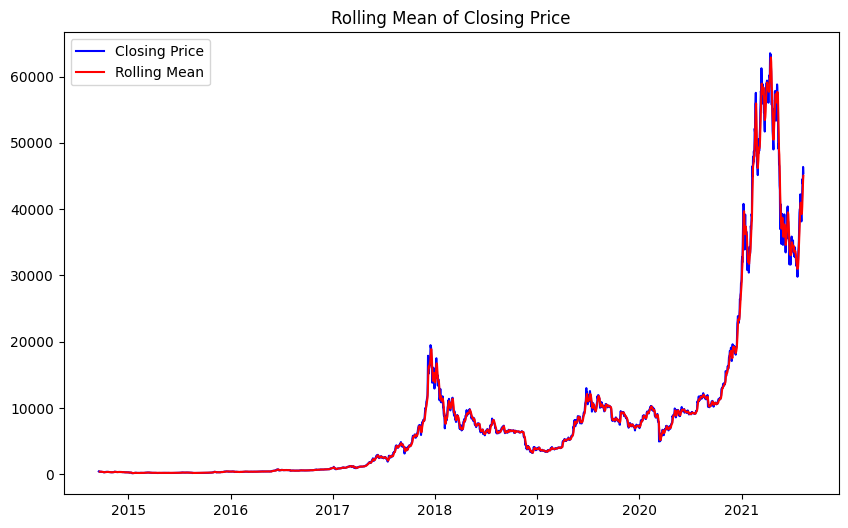

In [ ]:
#Check the stationarity of data using rolling mean and rolling standard deviation.

# Visualize Rolling mean
rolling_window = 4  # As data is quarterly, a window of 4 covers one year
rolling_mean = dfBitcoinCleaned['Close'].rolling(window=rolling_window).mean()

# Plotting rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dfBitcoinCleaned['Close'], color='blue', label='Closing Price')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Closing Price')
plt.show()

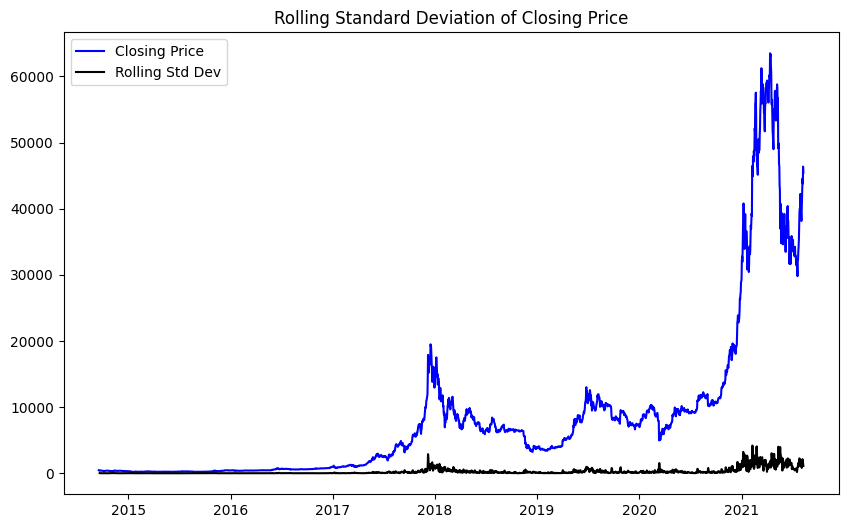

In [ ]:
# Rolling standard deviation
rolling_window = 4  # As data is quarterly, a window of 4 covers one year
rolling_std = dfBitcoinCleaned['Close'].rolling(window=rolling_window).std()

# Plotting rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dfBitcoinCleaned['Close'], color='blue', label='Closing Price')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation of Closing Price')
plt.show()

In [ ]:
# TODO-Stan:  The interpretations need to be modified below

Analysis of Rolling Mean and Standard Deviation
1. Rolling Mean Analysis:

The rolling mean plot shows a clear upward trend over the years. The mean is not constant but instead increases significantly, particularly from around 2014 onward.

2. Rolling Standard Deviation Analysis:

The rolling standard deviation appears relatively stable and low compared to the scale of sales.
Despite slight fluctuations, the rolling standard deviation does not show a trend but remains around the same level throughout the period.

3. Conclusion on Stationarity

Non-Stationarity: The time series is not stationary based on the rolling mean plot. For a time series to be considered stationary, it must have a constant mean, constant variance, and covariance that does not depend on time. In this case:

Mean: The mean is clearly not constant, displaying a noticeable upward trend.
Variance: While the rolling standard deviation is relatively stable, the presence of an increasing mean over time influences the overall decision about stationarity.

### **Make the time series data stationary**
### Apply a log transformation to reduce the variance of the series **bold text**
### **Eliminate the Trend and Seasonality by Differencing**
### Note: Ensure timeseries without NaN, inf, -inf values, Replace with 0 if found. **bold text**

In [ ]:
has_inf = np.isinf(dfBitcoinCleaned.values).any()

In [ ]:
has_inf

False

In [ ]:
has_nan = dfBitcoinCleaned.isnull().values.any()

In [ ]:
has_nan

False

In [ ]:
dfBitcoinCleaned

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...
2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10
2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10
2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10


In [ ]:
dfBitcoinCleaned['Log_Close'] = np.log(dfBitcoinCleaned['Close'])

In [ ]:
dfBitcoinCleaned

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,6.125414
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,6.050771
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,5.978369
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,6.013480
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,5.988513
...,...,...,...,...,...,...,...
2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10,10.664679
2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10,10.704498
2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10,10.687346


In [ ]:
has_inf = np.isinf(dfBitcoinCleaned.values).any()

In [ ]:
has_inf

False

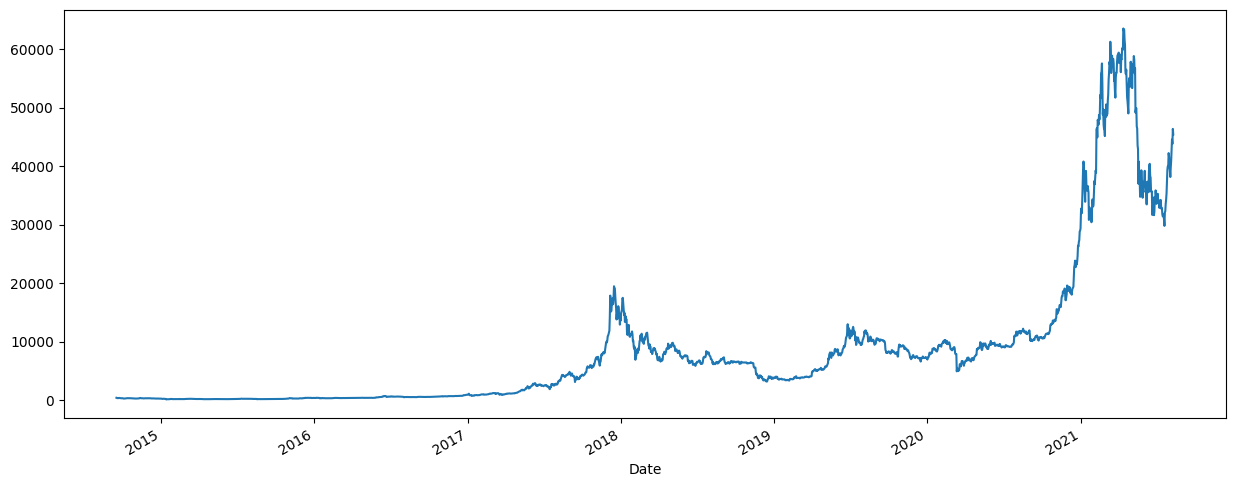

In [ ]:
dfBitcoinCleaned['Close'].plot(figsize=(15,6))
plt.show()

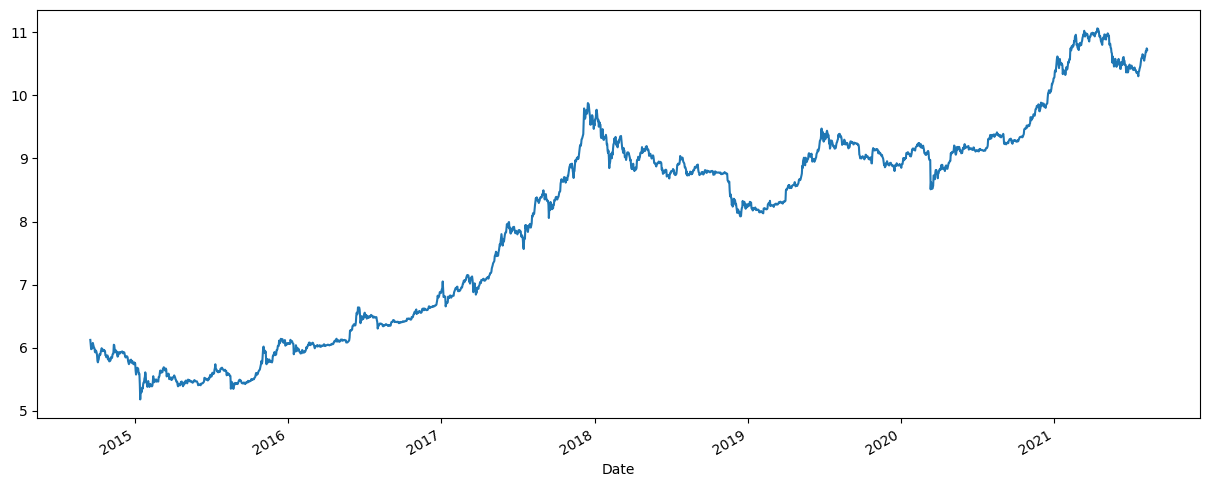

In [ ]:
dfBitcoinCleaned['Log_Close'].plot(figsize=(15,6))
plt.show()

In [ ]:
# perform difference here
shift_df = pd.concat([dfBitcoinCleaned['Log_Close'], dfBitcoinCleaned['Log_Close'].shift(7)],axis=1)

shift_df.columns = ['Actual','Forecasted']
shift_df.head(20)

,Actual,Forecasted
Date,,
2014-09-17,6.125414,NaN
2014-09-18,6.050771,NaN
2014-09-19,5.978369,NaN
2014-09-20,6.013480,NaN
2014-09-21,5.988513,NaN
2014-09-22,5.996830,NaN
2014-09-23,6.077163,NaN
2014-09-24,6.047857,6.125414
2014-09-25,6.019989,6.050771


In [ ]:
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=24).mean()
    rolling_std = timeseries.rolling(window=24).std()

    # Rolling statistics plot
    plt.figure(figsize=(15,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [ ]:
df_log_shift = shift_df['Actual'] - shift_df['Forecasted']
df_log_shift.dropna(inplace=True)

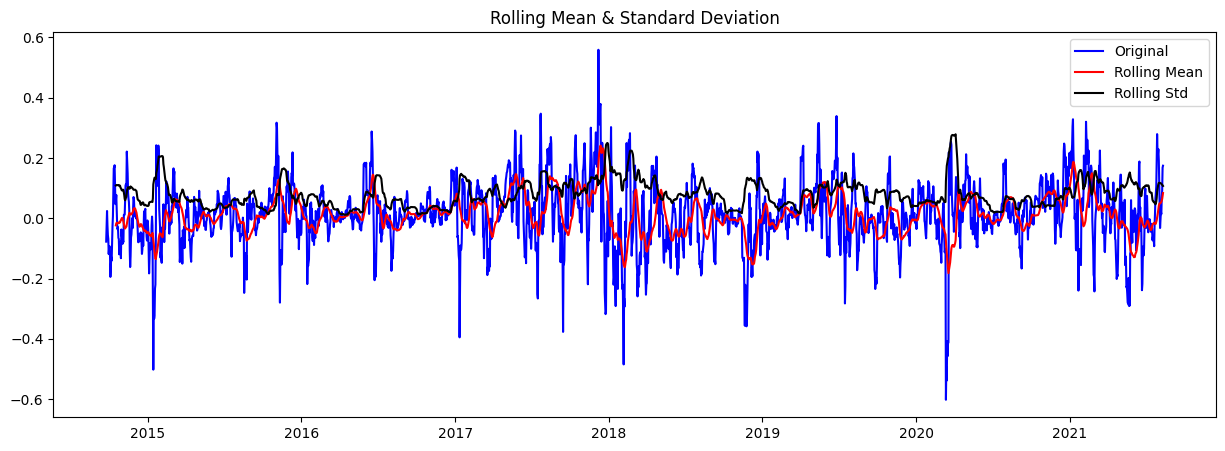

In [ ]:
get_stationarity(df_log_shift)

### Test the Stationarity using Augmented Dicky Fuller Test [1 point]

Verify the stationarity post differencing, using ADF

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:
df_log_shift

,0
Date,
2014-09-24,-0.077557
2014-09-25,-0.030782
2014-09-26,0.024097
2014-09-27,-0.023217
2014-09-28,-0.055788
...,...
2021-08-06,0.013661
2021-08-07,0.068013
2021-08-08,0.091339


In [ ]:
dfBitcoinCleaned.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Log_Close'], dtype='object')

In [ ]:
# YOUR CODE HERE
res = adfuller(df_log_shift, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
print(res)

(-9.119475608986782, 3.234400112379412e-15, 27, 2481, {'1%': -3.4329884839681255, '5%': -2.8627056642784483, '10%': -2.567390528901554}, -8458.83469118107)


In [ ]:
# Verify the stationarity post differencing, using ADF

#Perform Dickey Fuller test
ADFTestResult = adfuller(df_log_shift)
print('ADF Stastistic: %f'%ADFTestResult[0])
print('p-value: %f'%ADFTestResult[1])
print('Critical Values:')
for key,value in ADFTestResult[4].items():
    print('\t%s: %.3f ' % (key, value))


ADF Stastistic: -9.119476
p-value: 0.000000
Critical Values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
ADFTestResult

(-9.119475608986782,
 3.234400112379412e-15,
 27,
 2481,
 {'1%': -3.4329884839681255,
  '5%': -2.8627056642784483,
  '10%': -2.567390528901554},
 -8458.83469118107)

**The ADF Stats value is lesser than the critical value we reject null hypotheses, means it is a stationary time series.**

### Auto Correlation Plot [1 point]

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time.

* Plot the auto correlation function (ACF and PACF)
* Analyse ACF and PACF plots and define AR (p) and MA(q) terms

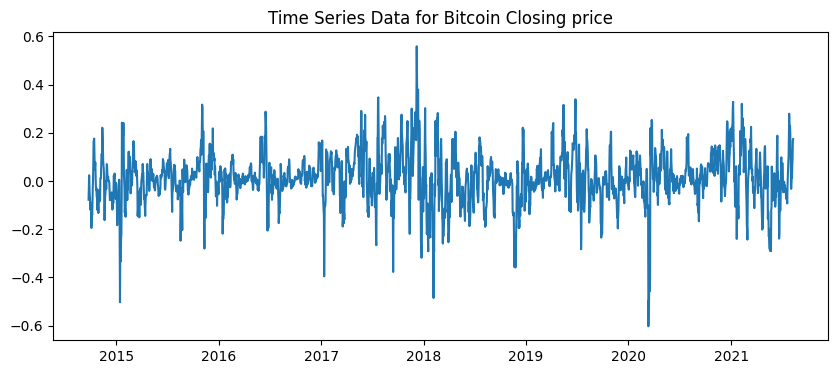

In [ ]:
# YOUR CODE HERE

# Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(df_log_shift)
plt.title('Time Series Data for Bitcoin Closing price')
plt.show()



In [ ]:
import statsmodels.api as sm

In [ ]:
shift_df.columns

Index(['Actual', 'Forecasted'], dtype='object')

In [ ]:
dfBitcoinCleaned.columns #['Log_Close']
dfBitcoinCleaned.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,6.125414
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,6.050771
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,5.978369
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,6.013480
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,5.988513
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,5.996830
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0,6.077163
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,6.047857
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,6.019989


In [ ]:
df_log_close = dfBitcoinCleaned['Log_Close']
#d = pd.DataFrame(dfBitcoinCleaned, index=Date, columns=['Log_Close'])


In [ ]:
df_log_close = df_log_close.diff(7).dropna()

In [ ]:
df_log_close


,Log_Close
Date,
2014-09-24,-0.077557
2014-09-25,-0.030782
2014-09-26,0.024097
2014-09-27,-0.023217
2014-09-28,-0.055788
...,...
2021-08-06,0.013661
2021-08-07,0.068013
2021-08-08,0.091339


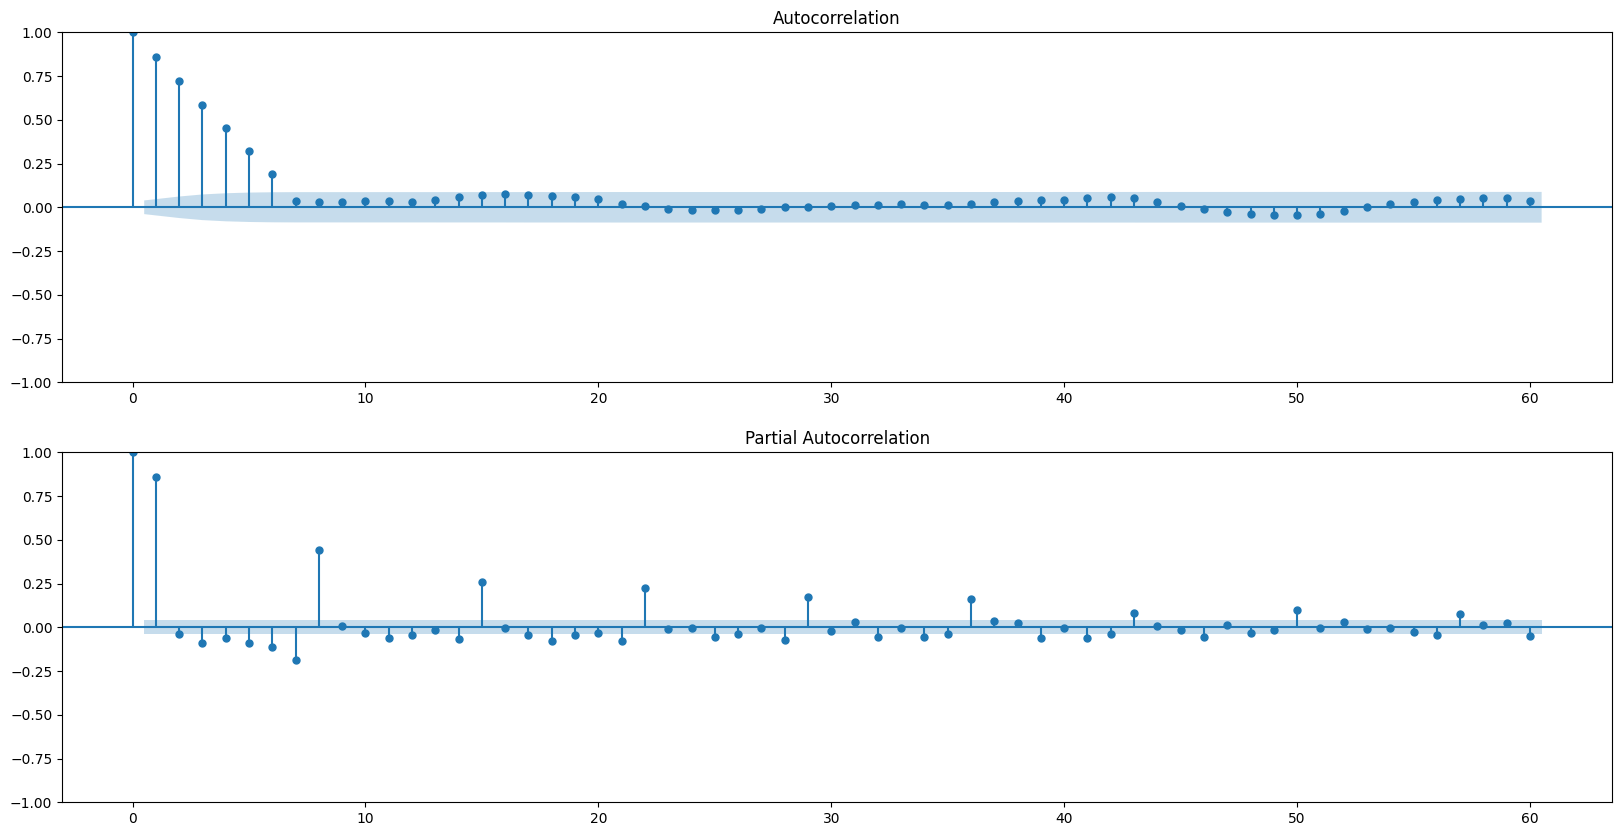

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(211)
plot_acf(df_log_close, ax=plt.gca(), lags = 60)
plt.subplot(212)
plot_pacf(df_log_close, ax=plt.gca(), lags = 60)
plt.show()
#sm.graphics.tsa.plot_acf(df_log_close, lags=60)

### Train the Auto Regressive model [1 point]

Hint: sm.tsa.AR()

In [ ]:
df_log_close

,Log_Close
Date,
2014-09-24,-0.077557
2014-09-25,-0.030782
2014-09-26,0.024097
2014-09-27,-0.023217
2014-09-28,-0.055788
...,...
2021-08-06,0.013661
2021-08-07,0.068013
2021-08-08,0.091339


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


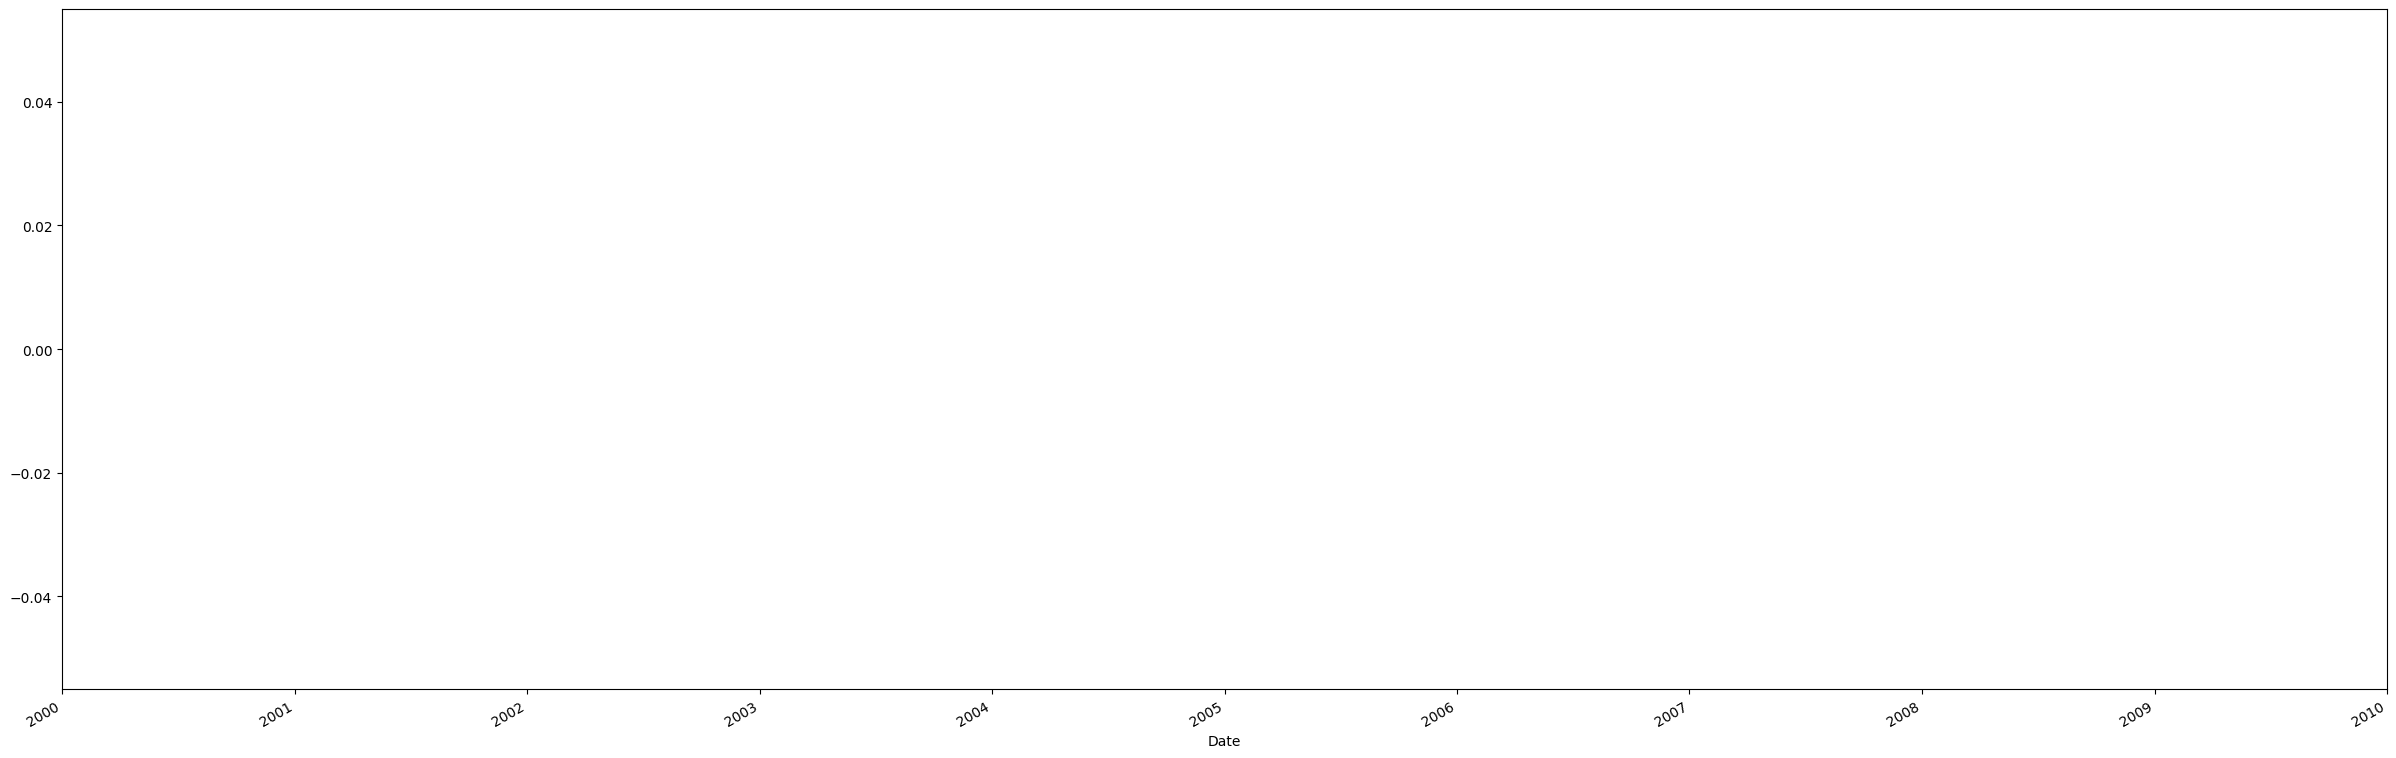

In [ ]:
# YOUR CODE HERE
import statsmodels as st
# regr = st.tsa.ar_model.AutoReg(time_series, lags = 7).fit()
model = st.tsa.ar_model.AutoReg(df_log_close, lags = 7)
model_fit = model.fit()
# print('Lag: %s' % model_fit.k_ar)
# print('Coefficients: %s' % model_fit.params)

fore = model_fit.predict()

#df_log_close.plot(figsize=(30,10))
fore.plot(figsize=(30,10))
plt.show()

In [ ]:
fore

,0
Date,
2014-09-24,NaN
2014-09-25,NaN
2014-09-26,NaN
2014-09-27,NaN
2014-09-28,NaN
...,...
2021-08-06,NaN
2021-08-07,NaN
2021-08-08,NaN


### ARMA Model [1 point]

* Train the ARMA model on timeseries data and print AIC value

In [ ]:
# YOUR CODE HERE for ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# ARMA model
model = ARIMA(df_log_close, order=(4, 0, 1))
model_fit = model.fit()
print(f"AIC Value: {model_fit.aic}")

predictions = model_fit.predict()
error = sqrt(mean_squared_error(df_log_close, predictions))
print('RMSE value: %.3f' % error)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC Value: -7520.7259805569065
RMSE value: 0.054


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Plot the predictions for timeseries data [1 point]

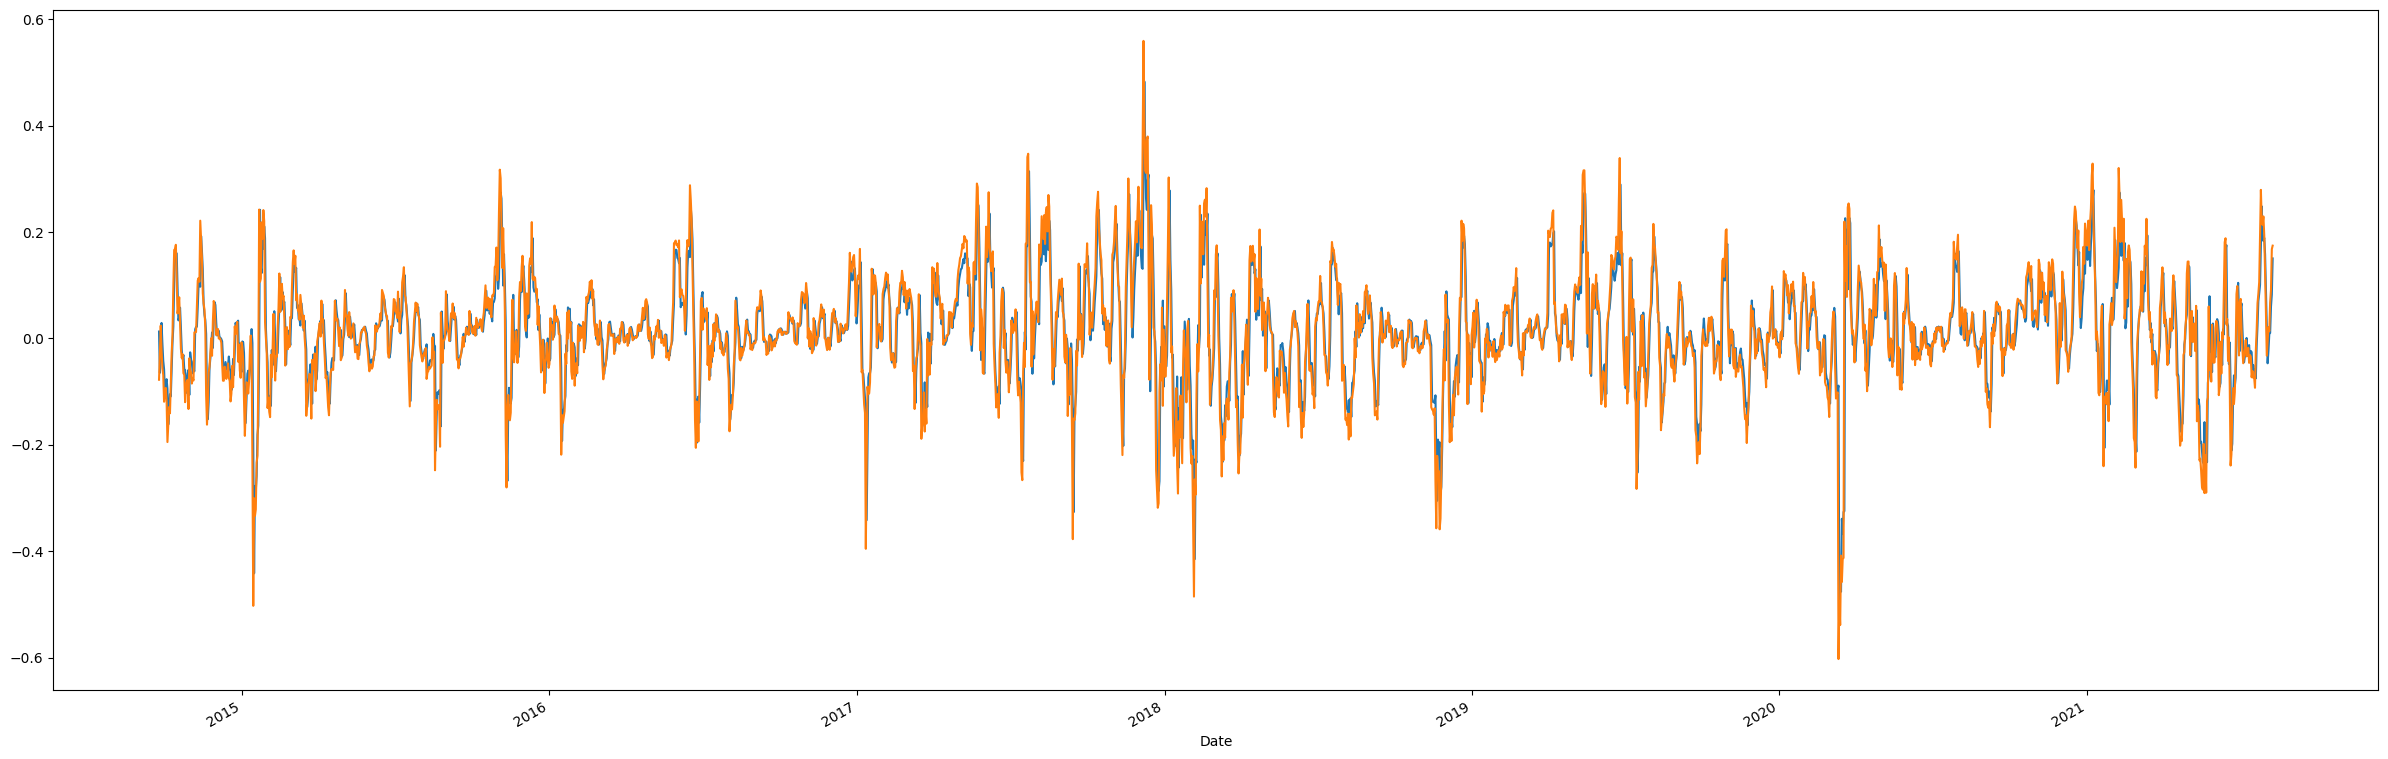

In [ ]:
# YOUR CODE HERE
predictions.plot(figsize=(30,10))
df_log_close.plot(figsize=(30,10))
plt.show()


### Report Analysis

* Discuss how sudden effects of bitcoin price affects the model parameters
* State your observations about the trend and seasonality of the timeseries data
* Discuss how you selected ARMA (p and q) terms.
* Interpret the AIC value obtained for the ARMA model